# 數據 Preprocessing Strategy

**key**:
- 身分證字號 
- 資料年月

**Basic Info**:
- 性別
- 年齡
- 生日月份 
- 客戶年收入
- 客戶行業別

**Date Columns (date type) Careful for dates of *1990-01-01***:
- 最初開戶日
- 最近交易日
- 最後通聯日
- 存單最近到期日
- 存款最近交易日
- 存款開戶日
- 信用戶開戶日期
- 信託帳戶開戶日
- 信託第一筆申購日
- 信託最近交易日
- 最近一次應繳日(要保人)
- 證券最近交易日
- 證券開戶日
- 房貸開戶日
- 放款最近交易日
- 放款結清戶日期
- 放款開戶日
- 信貸開戶日
- 信用卡開戶日
- 薪轉代理編號取號日
- Line_第一次綁定時間
- Line_最後綁定時間
- Line_第一次加好友時間  **has time**
- Line_好友狀態異動時間  **has time**
- 存款最早開戶日 (somehow stored as an int?)

**Date Columns as monnth(int)**:
- 往來期間(月)
- 最近交易期間(月) 
- 放款往來期間(月)
- 放款最近交易期間(月)
- 


The Months columns is solid, but I would like to change the date columns to numbers, prefereably to days up untill today.

To Deal with dates on **1900-01-01**, I will set it to zero while other dates set as **negative numbers**.

**Columns that need to Combine**:
 - 客戶職稱 and ELOAN職稱 take values on Eloan, fill with 客戶職稱 if empty.
 - 信用卡職位別? - probably most reliable? Maybe? i dunno?
 - 

**Numerical Continuous Variable**:
 - **No need any change, since were going to use LGBM which based on decision trees, normalizing is unneccesary**:
 - **These Columns need to be aggregated when joining datasets by month**
 - all columns apart from categories will be treated as numerical
  
**Categorical**:
 - **multiple categories (one hot encode) or should i treat it as numerical?**:
  - 投資屬性 (also need to take down if there is a change in this when merging datasets)
  - 尊榮理財會員等級 (record change in months)
  - 對帳單寄送記號 (0,1,2)
  - 網路使用記號-行動銀行 (0,1,2,3)
  - 網路服務記號 (0,1,2,3,6,8) (but july data sample only has 1,3,6 might need to keep as is)
  - 存款記號 (0,1,2)
  - 人民幣存款註記 (N, Y, NaN)
  - 歐元存款註記 (N, Y, NaN)
  - 澳幣存款註記 (N, Y, NaN)
  - 南非幣存款註記 (N, Y, NaN)
  - 放款記號 (0,1,2)
  - 證券記號 (0,1,2)
  - 銀行推介(證券端記號)記號 (0,1,NaN)
  - 黃金存摺戶記號 (0,1,2)
  - 銀行電話銷售記號 (0,1)
  - 共同行銷／合作推廣（證券）(0,1,2)
  - 個金放款型客戶 (0,1,2,NaN)
  - 特定金錢信託客戶投資有價證券推介同意書 (0,1,2)
  - 住宅記號 (0,1,2,3,4,5,6)
  - 信用卡逾期紀錄 (NaN,0,1,2,3,4,5,6,7,8)
  - 信用評等資料-中擔餘額  (these contain 27 combinations. starting wiht int 0-9, and a letter (H,M,L) also 00 and NaN) 
  - 信用評等資料-長擔餘額  (same as above)
  - 信用評等資料-信貸餘額  (same as above)
  - 電話１(戶籍)失聯記號 (NaN,0,1) NaN is probably considered as unknown, so need to keep it
  - 電話２(住家)失聯記號
  - 電話４(公司)失聯記號
  - 電話５(行動)失聯記號
  - 電話８(其他)失聯記號
  - 關係戶記號
  - 數位帳戶等級記號
  - 全行往來產品數(持有1階):      7
  - 全行往來產品數(持有2階):      8
  - 全行往來產品數(使用1階):      6
  - 全行往來產品數(使用2階):      8
  
 - **change data type (Yes should all be 1 and no be 0)**:
  - 信用卡VIP客戶註記 (change to 0 and 1)
  - 網易收會員記號 (0 is NaN now, need to change null values to 0)
  - 豐掌櫃會員記號 (from Y and N to 1 and 0)
  - 外幣存款記號 (from Y and N to 1 and 0)
  - 外幣活存記號 (change NaN to 0)
  - 美金存款註記 (change Y and NaN to 1 and 0)
  - 保管箱記號 (Y, NaN)
  - 主經管人員 (random number, NaN) (Change to 1 and 0 to see if an account holder affects results)
  - 通訊地址失聯記號 (Y, NaN)
  - 定時定額記號 (Y, NaN)
  - 保險-要保人記號 (NaN, 0, 1) (NaN is 0 so change that)
  - 保險-被保人記號 (same as above)
  - 家庭保障險申購記號(要保人) (NaN,1) change NaN to zero
  - 家庭保障險申購記號(被保人) same above
  - 產險-要保人記號 (NaN,1)
  - 單筆申購記號 (Y,N) change to (1,0)
  - 自動扣款記號 (Y,N)
  - 信用卡轉呆記號 (Y,N)
  - 信用循環戶記號 (NaN,0,1) change NaN to 0
  - 電子化通路記號 (N,Y) change to 0,1 but right now entire column is N
  - 主戶ID (int) change to if this account has 主戶 (1,0)
  - 
  
  
 - **no need changes**:
  - 網路使用記號
  - ibrAin記號
  - MMA+記號
  - MMA記號
  - 薪轉戶記號(三個月)
  - 拒絕往來戶記號
  - 催收記號  check: 催收什麼
  - 呆帳記號
  - 存款記號
  - 呆帳記號
  - 人身保險記號 (0,1)
  - 產險記號 (0,1)
  - 銀行電話銷售記號 (0,1)
  - 最近逾期記號 (0,1)
  - 投資型保險申購記號(要保人) (0,1)
  - 投資型保險申購記號(被保人) (0,1)
  - 房貸壽險申購記號(要保人) (0,1)
  - 房貸壽險申購記號(被保人) (0,1)
  - 儲蓄養老險申購記號(要保人) 
  - 儲蓄養老險申購記號(被保人)
  - 放款結清戶記號
  - 理財型房貸記號
  - 停滯戶記號
  - 存款持有
  - 外幣存款持有
  - 台幣存款持有
  - 授信持有
  - 房貸持有
  - 授信持有                       int64
  - 房貸持有                       int64
  - 車貸持有                       int64
  - 信貸持有                       int64
  - 個金其他放款持有                   int64
  - 黃金存摺持有                     int64
  - 人身保險持有                     int64
  - 人身保險(投資型)持有                int64
  - 人身保險(家庭保障)持有               int64
  - 人身保險(儲蓄養老)持有               int64
  - 人身保險(房貸壽險)持有               int64
  - 財產保險持有                     int64
  - 財產保險(住宅火險)持有               int64
  - 財產保險(傷害險+健康險)持有            int64
  - 信用卡持有                      int64
  - 信用卡(信用卡)持有                 int64
  - Debit Card持有               int64
  - 金流持有                       int64
  - 外匯持有                       int64
  - 存款使用                       int64
  - 台幣存款使用                     int64
  - 外幣存款使用                     int64
  - 授信使用                       int64
  - 房貸使用                       int64
  - 車貸使用                       int64
  - 信貸使用                       int64
  - 個金其他放款使用                   int64
  - 投資理財使用                     int64
  - 基金使用                       int64
  - ETF使用                      int64
  - 債券使用                       int64
  - ibrAin使用                   int64
  - 黃金存摺使用                     int64
  - 人身保險使用                     int64
  - 人身保險(投資型)使用                int64
  - 人身保險(家庭保障)使用               int64
  - 人身保險(儲蓄養老)使用               int64
  - 人身保險(房貸壽險)使用               int64
  - 財產保險使用                     int64
  - 財產保險(住宅火險)使用               int64
  - 財產保險(傷害險+健康險)使用            int64
  - 信用卡使用                      int64
  - 信用卡(信用卡)使用                 int64
  - Debit Card使用               int64
  - 金流使用                       int64
  - 外匯使用                       int64

**Columns that need to be deleted**:
 - 員工記號
 - 金控員工記號(非銀行)
 - 網路會員記號 ( all 1 since only dawho users)
 - 小mma記號 (all zero?) 
 - MMA標會網客戶記號 (all zeros) 
 - 數位帳戶記號 (Dont know why there is a 0, but delete this column)
 - 薪轉公司統編 (dont need this i believe)
 - 專業投資人記號 (all zeroes in current data)
 - 秘密戶記號 (all zeroes)
 - 壽險理財金記號 (all zeroes)
 - 共同行銷／合作推廣（人保）(all NaN)
 - 個保法記號
 - ETF近1個月申購次數 (all zero)
 - ETF近1個月申購金額 (all zero)
 - 理財型房貸透支領用餘額(月底日)
 - 分行別 (way to much to make into categorical, omit)
 - 企業客戶AP
 - 企金行業別
 - 企審催收記號
 - 公司戶記號
 - 企業客戶年度AP
 - 信保記號
 - SI/DCI投資未到期金額(外幣)
 - SI/DCI投資未到期金額(台幣)
 - SI/DCI投資未到期總金額
 - SI/DCI近1個月申購金額(外幣)
 - SI/DCI近1個月申購金額(台幣)
 - SI/DCI近1個月申購次數
 - SI/DCI近12個月申購金額(外幣)        float64
 - SI/DCI近12個月申購金額(台幣)        float64
 - SI/DCI近12個月申購次數            float64
 - SI/DCI近12個月申購總金額           float64
 - SI/DCI近1個月申購總金額
 - 有擔保額度
 - 最近十二個月M2次數
 - 最近十二個月收單金額(元)
 - 最近一個月收單金額(元)
 - 授信餘額
 - 授信總金額
 - 無擔保額度
 - 負責人身份證字號
 - 業績統計用資產規模(含家族戶)
 - 額度動用率
 - SI/DCI記號
 - 中小企業記號(Y/N)
 - 薪轉代理編號                     object
 - 薪轉代理編號取號日                  object
 - SN近1個月申購金額                 float64
 - SN近6個月申購金額                 float64
 - SN記號                       int64
 - CIFAOCODE
**Note: columns with all zeroes might night be a good representation of the entire data, as sample size might be
too small. But for the sake of simplicity it will be removed in this notebook.**

**Or leave them as is, and later on let them be deleted from feature selection**
 
**Possible Y prediction values (number of models needed), which we will fit onto an ensemble classifier**:
  - 放款記號 (0,1,2) **One multiclass model**
  - 房貸記號 (0,1) **One Binary Model**
  - 信貸記號 (0,1) **One Binary Model**
  - 信用卡記號 (0,1,2) **One Multiclass model**
  - ETF記號 (0,1) **one binary model**
  - 房貸持有
  - 授信持有
  - 授信持有                       int64
  - 房貸持有                       int64
  - 車貸持有                       int64
  - 信貸持有 


In [1]:
# import libraries
import numpy as np
import pandas as pd

# plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore")

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [3]:
# load dataset (lets assume this is training set)
# we can test on anothera queried random result data later on if necessary
data = pd.read_csv(r"C:\Users\120200\Desktop\Product Recommendation-Tiger\Train\B360_202107_10Percent_DawhoOnly.csv")
df = data

In [35]:
len(df['客群面向_大戶客戶註記'][df['近三個月大戶app使用記號'] > 0])/len(df)

0.6630699904915457

In [3]:
# inspect our data
# data.head(10) 

In [4]:
data.shape

(15523, 645)

In [5]:
# check for null values
pd.set_option('display.max_rows', 1000)
data.isnull().sum()

資料年月                           0
身分證字號                          0
性別                             0
年齡                             0
生日月份                           0
客戶年收入                          0
客戶行業別                       3149
客戶職稱                           0
ELOAN職稱                    14449
最初開戶日                          0
往來期間(月)                        0
最近交易日                          0
最近交易期間(月)                      0
最後通聯日                          0
員工記號                           0
金控員工記號(非銀行)                    0
投資屬性                       14256
尊榮理財會員等級                       0
信用卡VIP客戶註記                     0
對帳單寄送記號                        0
網易收會員記號                    15504
網路使用記號                         0
網路使用記號-行動銀行                    0
網路服務記號                         0
網路會員記號                         0
ibrAin記號                       0
MMA+記號                         0
MMA記號                          0
小mma記號                         0
MMA標會網客戶記號                     0
數位帳戶記號    

In [32]:
for i in data_dropped.columns:
    uniques = len(data[i].value_counts(dropna=False))
    print(str(i) + ":      " + str(uniques))

身分證字號:      15523
性別:      3
年齡:      61
生日月份:      12
客戶年收入:      434
客戶行業別:      28
客戶職稱:      18
ELOAN職稱:      21
最初開戶日:      2158
往來期間(月):      293
最近交易日:      251
最近交易期間(月):      36
最後通聯日:      641
員工記號:      2
金控員工記號(非銀行):      2
投資屬性:      6
尊榮理財會員等級:      5
信用卡VIP客戶註記:      2
對帳單寄送記號:      3
網易收會員記號:      2
網路使用記號:      2
網路使用記號-行動銀行:      4
網路服務記號:      3
ibrAin記號:      2
MMA+記號:      2
MMA記號:      2
數位帳戶記號:      2
豐掌櫃會員記號:      2
薪轉公司統編:      302
薪轉戶記號(三個月):      2
拒絕往來戶記號:      2
催收記號:      2
呆帳記號:      2
存款記號:      3
外幣存款記號:      2
外幣活存記號:      2
美金存款註記:      2
人民幣存款註記:      3
歐元存款註記:      3
澳幣存款註記:      3
南非幣存款註記:      3
放款記號:      3
房貸記號:      2
信貸記號:      2
信託記號:      2
信用卡記號:      3
人身保險記號:      2
產險記號:      2
證券記號:      3
證券推介開戶記號:      2
銀行推介(證券端記號)記號:      3
黃金存摺戶記號:      3
銀行電話銷售記號:      2
保管箱記號:      2
保證人記號:      2
保管箱租金:      3
主經管人員:      347
共同行銷／合作推廣（證券）:      3
個金放款型客戶:      4
特定金錢信託客戶投資有價證券推介同意書:      3
最近逾期記號:      2
通訊地址失聯記號:      2
台外幣總存款:      13645
台幣支存

DMP_外幣定存:      2
DMP_台幣定存:      2
DMP_兒童帳戶:      2
DMP_理財型房貸:      2
DMP_二順位房貸:      2
DMP_房貸:      2
DMP_汽車貸款:      2
DMP_信用卡_保倍卡:      2
DMP_信用卡_DAWHO現金回饋Debit卡:      2
DMP_信用卡_DAWHO現金回饋卡:      2
DMP_信用卡_Sport_debit卡:      2
DMP_信用卡_三井卡:      2
DMP_信用卡_永豐世界卡:      2
DMP_信用卡_永豐財富無限卡:      2
DMP_信用卡_永豐運動卡:      2
DMP_信用卡_東森網連通聯名卡:      2
DMP_信用卡_美安聯名卡:      2
DMP_信用卡_財富無限/世界虛擬卡:      2
DMP_信用卡_國民旅遊卡:      2
DMP_信用卡_現金回饋debit卡:      2
DMP_信用卡_現金回饋卡:      2
DMP_信用卡_鈦豐卡:      2
DMP_信用卡_夢行卡:      2
DMP_信用卡_幣倍卡:      2
DMP_信用卡_興大分行限定版Debit卡:      2
DMP_安養信託:      2
DMP_保險金信託:      2
DMP_有價證券出借信託:      2
DMP_有價證券贈與信託:      2
近六個月未登入數位平台:      2
存款最早開戶日:      941
台幣活儲持有帳號數:      3
台幣活儲使用帳號數:      3
台幣定儲_存本取息:      34
台幣定儲_整存整付:      74
台幣定儲_零存整付:      21
外幣活期持有帳號數:      9
外幣活期使用帳號數:      6
美金活期折台:      2387
人民幣活期折台:      60
美金定期折台:      411
人民幣定期折台:      40
近三個月網銀使用記號:      2
近三個月Mobile使用記號:      2
近三個月大戶app使用記號:      2
庫存基金原始投資金額:      144
庫存ETF原始投資金額:      4
庫存ibrain原始投資金額:      49
網銀轉帳備註_公

# Dealing with NULL columns
# skip for now since we will join a lot of files

In [6]:
# change series above to dictionary
df_dict = data.isnull().sum().to_dict()

In [7]:

mylist = []
for key in df_dict:
    if (len(data[key].value_counts(dropna=False)) == 1):
        mylist.append(key)

In [8]:
# create new dataframe while dropping columns from list above
data_dropped = data.drop(mylist, axis=1)

In [9]:
# check data
# data_dropped.shape
# data_dropped.nunique()

In [10]:
# lets drop id as well
#data_dropped.drop(["身分證字號"], axis=1, inplace=True)

In [33]:
# lets move on to EDA
# rename
# df = data_dropped
# check data type for numerical columns (not categorical)
data_dropped.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 512 columns):
身分證字號                      object
性別                         int64
年齡                         int64
生日月份                       int64
客戶年收入                      float64
客戶行業別                      object
客戶職稱                       object
ELOAN職稱                    object
最初開戶日                      object
往來期間(月)                    int64
最近交易日                      object
最近交易期間(月)                  int64
最後通聯日                      object
員工記號                       int64
金控員工記號(非銀行)                int64
投資屬性                       float64
尊榮理財會員等級                   int64
信用卡VIP客戶註記                 object
對帳單寄送記號                    int64
網易收會員記號                    float64
網路使用記號                     int64
網路使用記號-行動銀行                int64
網路服務記號                     int64
ibrAin記號                   int64
MMA+記號                     int64
MMA記號                      int64
數位帳戶記號            

NoneType

In [46]:
# data['存款最早開戶日'].value_counts(dropna=False)

data['存款最早開戶日'][1]
# 主經管人員

20210322.0

In [40]:
data['信用卡VIP客戶註記'].dtype == np.int

False

In [55]:
# correlation data
correlation = data.corr()


# EDA
# 年齡

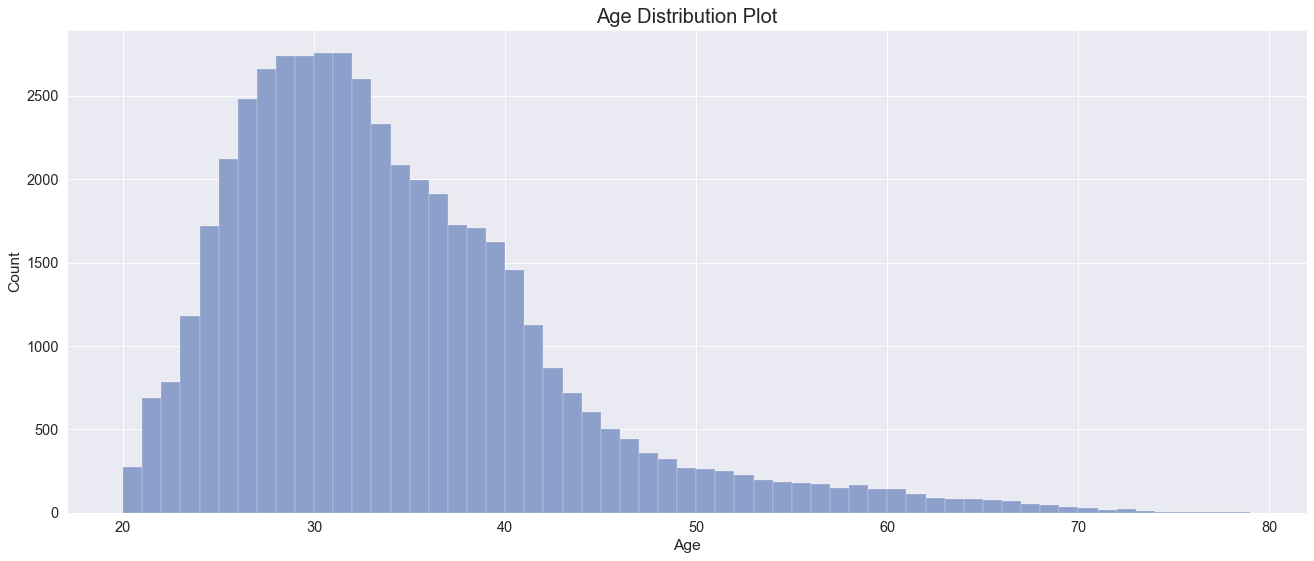

In [10]:
# lets graph our age distribution
df = data
bins = np.arange(20, 80, 1)
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(df['年齡'],
         bins=bins,
         color=sns.color_palette('Set2')[2],
         linewidth=0.2)
plt.title('Age Distribution Plot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
df['年齡'].to_csv(r"C:\Users\120200\Desktop\Product Recommendation-Tiger\for ppt\graph_age.csv", index=False)
# I guess its a little skewed to the left which is normal

In [10]:
# calculating IQR and finding range
len(df['年齡'][df['性別'] == 2])/len(df)

0.5574227954855513

# 客戶年收入 

In [146]:
# next take a look at 
df['客戶年收入'].describe()
# we can see that for this column the mean extremely high compare to 
# 50% and even 75% value
# this data is heavily affected by some very large outliers
# plotting a distribution graph will not be as useful

count     15523.000000
mean       5426.980094
std       48185.655914
min           0.000000
25%         400.000000
50%         600.000000
75%         800.000000
max      999990.000000
Name: 客戶年收入, dtype: float64

In [13]:
# calculating IQR and finding range
income = df['客戶年收入']
Q1 = np.percentile(income, 25, interpolation = 'midpoint') # The lower quartile Q1
Q3 = np.percentile(income, 75, interpolation = 'midpoint') # The upper quartile Q3
IQR = Q3-Q1 # Interquartile range 
lowerBound = Q1-1.5*IQR
upperBound = Q3+1.5*IQR # The outlier range is calculated.
upperBound

1400.0

In [11]:
len(df['客戶年收入'][df['客戶年收入'] == 0]) / len(df)

0.014882797966017611

In [14]:
# create new df with condition
income_IQR = df[df['客戶年收入'] < upperBound]['客戶年收入']
len(income_IQR)

44653

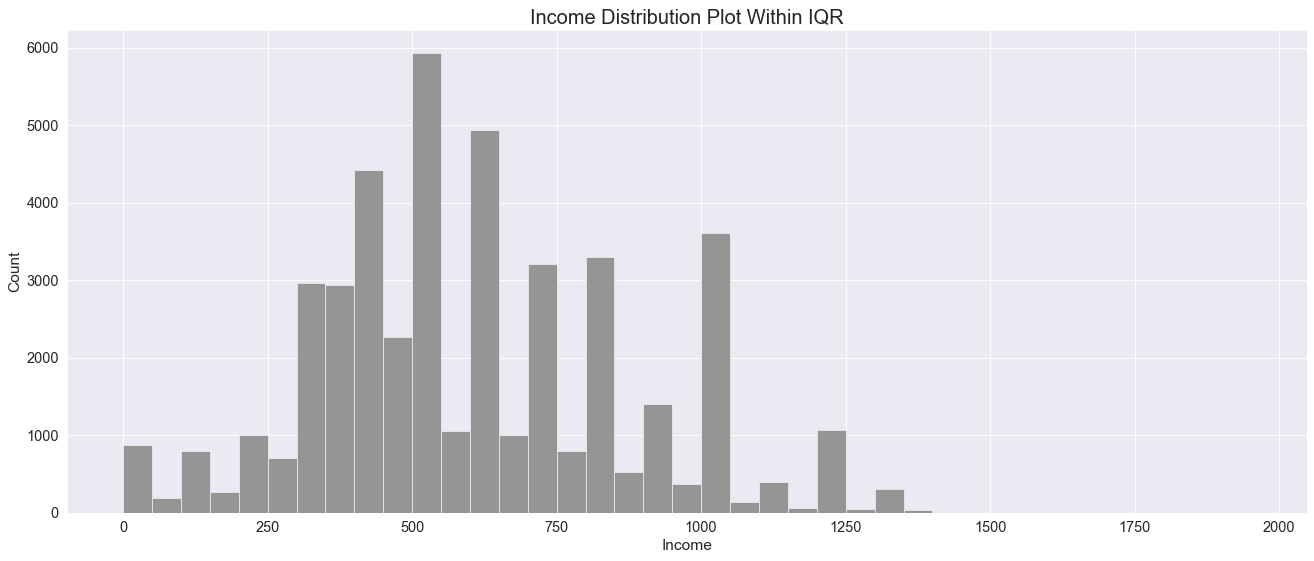

In [24]:
# now lets plot our income data within our interquartile rage
bins = np.arange(0, 2000, 50)
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(income_IQR,
         bins=bins,
         color=sns.color_palette('Greys', 1),
         linewidth=0.5)
plt.title('Income Distribution Plot Within IQR')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [172]:
# create new df with condiiton greater than IQR
income_outliers = df[df['客戶年收入'] > upperBound]['客戶年收入']
len(income_outliers)

1202

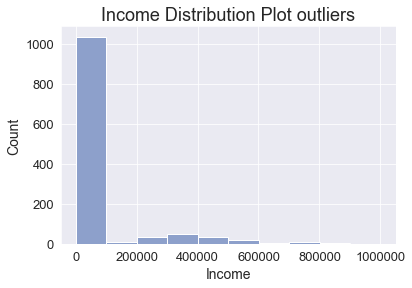

In [173]:
# now lets plot our income data outliers
plt.hist(income_outliers,
         color=sns.color_palette('Set2')[2],
         linewidth=1)
plt.title('Income Distribution Plot outliers')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# there are extreme cases in our dataset
# either remove them or we do not use K-means algorithm 
# k-means tries to optimize sum of square hence is heavily affected by outliers
# we can try different clustering algorithms such as DBscan or remove outliers and use k means

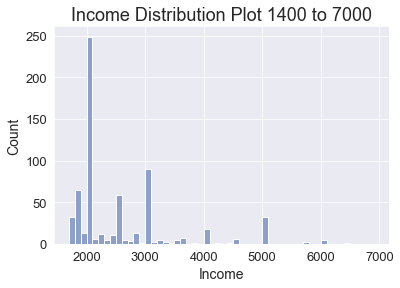

In [177]:
# lets look at the range 0 to 100000 with small bins just for fun
myIncomeRange = df[(df['客戶年收入']> upperBound) & (df['客戶年收入'] < 7000)]['客戶年收入']
len(myIncomeRange)      # 496, most outliers are still within some range

# plot
bins = np.arange(1700, 7000, 100)
plt.hist(myIncomeRange,
         bins=bins,
         color=sns.color_palette('Set2')[2],
         linewidth=1)
plt.title("Income Distribution Plot " + str(int(upperBound)) +  " to 7000")
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

# 客戶行業別

In [52]:
# taking a look at job categories
# df['客戶行業別'].value_counts(dropna=False) # there are also 1577 null values
# df['客戶職稱'].value_counts(dropna=False) # Note that some are identical, like 會計師 is in two keys so that 1 guy at the very bottom might be 建築師?
# df['ELOAN職稱'].value_counts(dropna=False) # a lot of null here prbably drop this column
#Ａll three of them are categorical variables, we will think about how to deal with them later
# most probably one hot encode?
len(df[df['職稱'] == '一般職員'])/len(df)

0.28955310264996487

In [41]:
# jd_eloan = df['ELOAN職稱'].to_list()
# jd_card = df['信用卡職位別'].to_list()
# jd_customer = df['客戶職稱'].tolist()
# for i in np.arange(0, len(jd_eloan), 1):
#     if isinstance(jd_eloan[i],str):
#         continue
#     elif isinstance(jd_card[i], str):
#         jd_eloan[i] = jd_card[i]
#     elif isinstance(jd_customer[i], str):
#         jd_eloan[i] = jd_customer[i]
#     else:
#         continue
# df.drop(['ELOAN職稱', '信用卡職位別', '客戶職稱'], axis=1, inplace=True)
# df['職稱'] = pd.Series(jd_eloan)
temp = pd.DataFrame(df['職稱'].value_counts(dropna=False))
pd.set_option('display.max_rows', None)
temp.to_csv(r"C:\Users\120200\Desktop\jd.csv", encoding='utf-8-sig')
temp

,職稱
一般職員,14008
退休職員,13533
無,3761
其他,2828
"管家,自由業",1658
退休公務員,1448
"職(店)員,辦事(作業)員,業務",1391
醫護人員,1267
退休教員,1074
中階主管（副科／科長級以上）,969


# 投資屬性，尊榮理財會員等級

In [154]:
df['投資屬性'].value_counts(dropna=False) # Mostly NA (91.86 %) so less than 10 percent are involved investing
# this might be important since having a value in this column means they
# engage in some sort of investing activity or is buing funds

# df['尊榮理財會員等級'].value_counts(dropna=False) # mostly zero, probbaliy highly correlated with 投資屬性

NaN    14256
5.0      543
4.0      454
3.0      163
6.0       68
1.0       39
Name: 投資屬性, dtype: int64

# 對帳單寄送記號

In [155]:
# note here that even though its categorical there are identical values with different classes
a = df['對帳單寄送記號'].unique()
for i in a:
    print(str(i) + " is " + str(type(i)))

2 is <class 'numpy.int64'>
0 is <class 'numpy.int64'>
1 is <class 'numpy.int64'>


# 網路使用記號-行動銀行

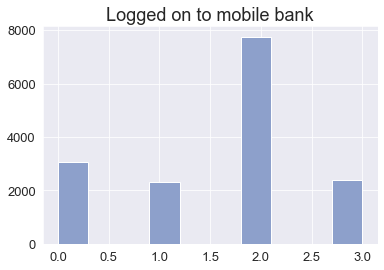

In [156]:
plt.hist(df['網路使用記號-行動銀行'],
         color=sns.color_palette('Set2')[2],
         linewidth=1)
plt.title('Logged on to mobile bank')
plt.show()
# Most people logged in this yea (2)  
# Last log in was greater than a year (3)
# Logged in this month (1) ----> quite less monthly active users... hopefully 20%? lets check
# never logged in (0)... 2nd most, this is pretty bad

In [157]:
print(
    str("{:.2f}".format(len(df[df['網路使用記號-行動銀行']==1]['網路使用記號-行動銀行'])/len(df['網路使用記號-行動銀行'])*100)) + "% of total users are MUAs"
)
print(
    str("{:.2f}".format(len(df[df['網路使用記號-行動銀行']==0]['網路使用記號-行動銀行'])/len(df['網路使用記號-行動銀行'])*100)) + "% never logged in"
)
# so quite a bit far from ths 20-80 ideal rule....
# but 15% not bad i guess

14.89% of total users are MUAs
19.75% never logged in


# 台外幣總存款

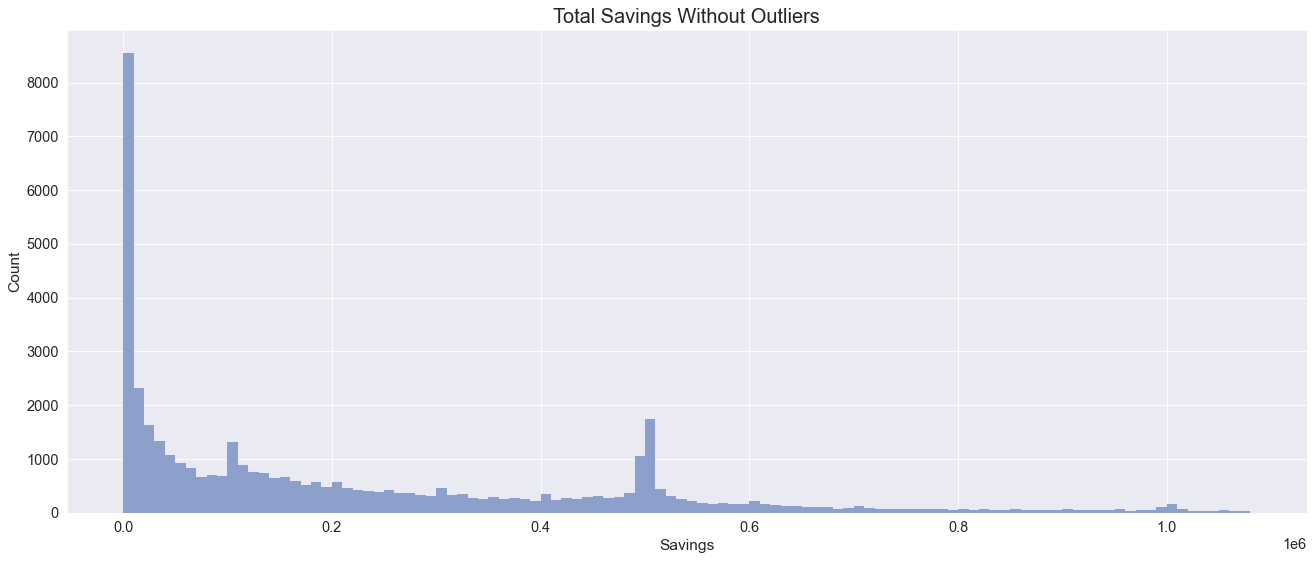

1080357.0


In [53]:
# again there are outliers in this column, lets Calculate IQR and graph data within specific range only
savings = df[df['台外幣總存款']!=0]['台外幣總存款']
Q1 = np.percentile(savings, 25, interpolation = 'midpoint') # The lower quartile Q1
Q3 = np.percentile(savings, 75, interpolation = 'midpoint') # The upper quartile Q3
IQR = Q3-Q1 # Interquartile range
upper_limit = Q3+1.5*IQR 
lower_limit = Q1-1.5*IQR

# set a bin range
bins = np.arange(1,upper_limit,10000) 

#plot
savingsIQR = df[(df['台外幣總存款'] < upper_limit) & (df['台外幣總存款'] > 0)]['台外幣總存款']
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(savingsIQR,
         bins=bins,
         color=sns.color_palette('Set2')[2],
         linewidth=0
        )
plt.title('Total Savings Without Outliers')
plt.xlabel('Savings')
plt.ylabel('Count')
plt.show()
print(upper_limit)

In [62]:
df[df['台外幣總存款'] < 1080357]['台外幣總存款'].describe()

count    4.686100e+04
mean     2.158242e+05
std      2.451801e+05
min      0.000000e+00
25%      1.111500e+04
50%      1.167138e+05
75%      3.778880e+05
max      1.080118e+06
Name: 台外幣總存款, dtype: float64

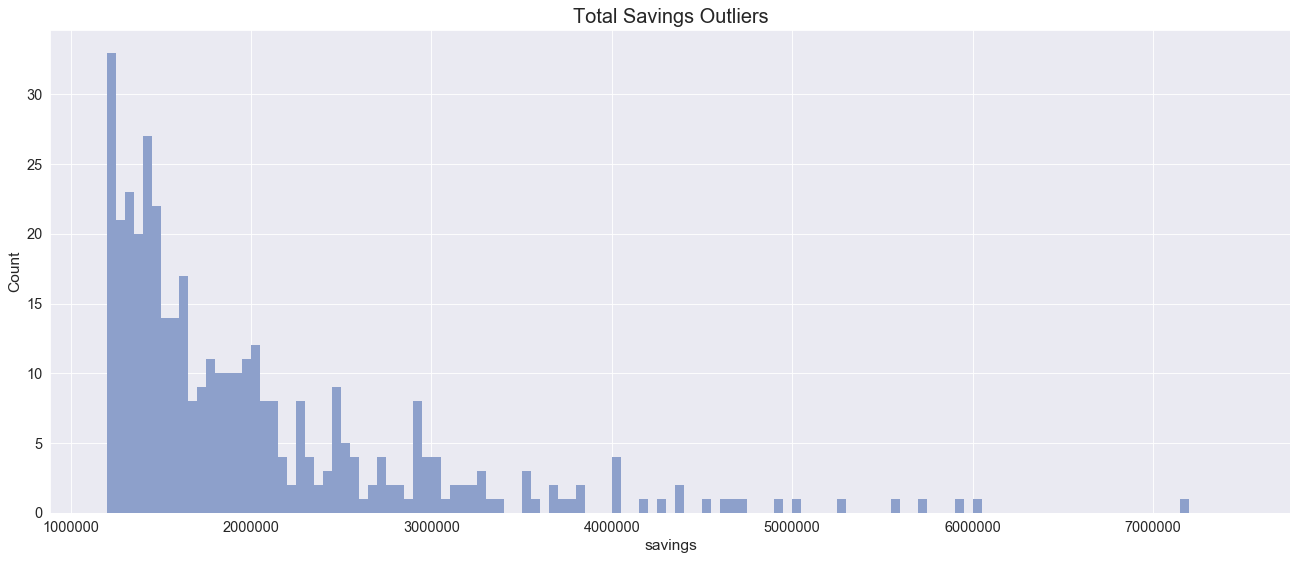

In [159]:
# plot: outliers (small part)
bins = np.arange(1200001,7500000,50000)
savingsOutliers = df[df['台外幣總存款'] > upper_limit]['台外幣總存款']
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(savingsOutliers, 
         bins=bins,
         color=sns.color_palette('Set2')[2],
         linewidth=0
        )
plt.title('Total Savings Outliers')
plt.ticklabel_format(style = 'plain') # stops label from showing scientific
plt.xlabel('savings')
plt.ylabel('Count')
plt.show()

<Figure size 1600x640 with 0 Axes>

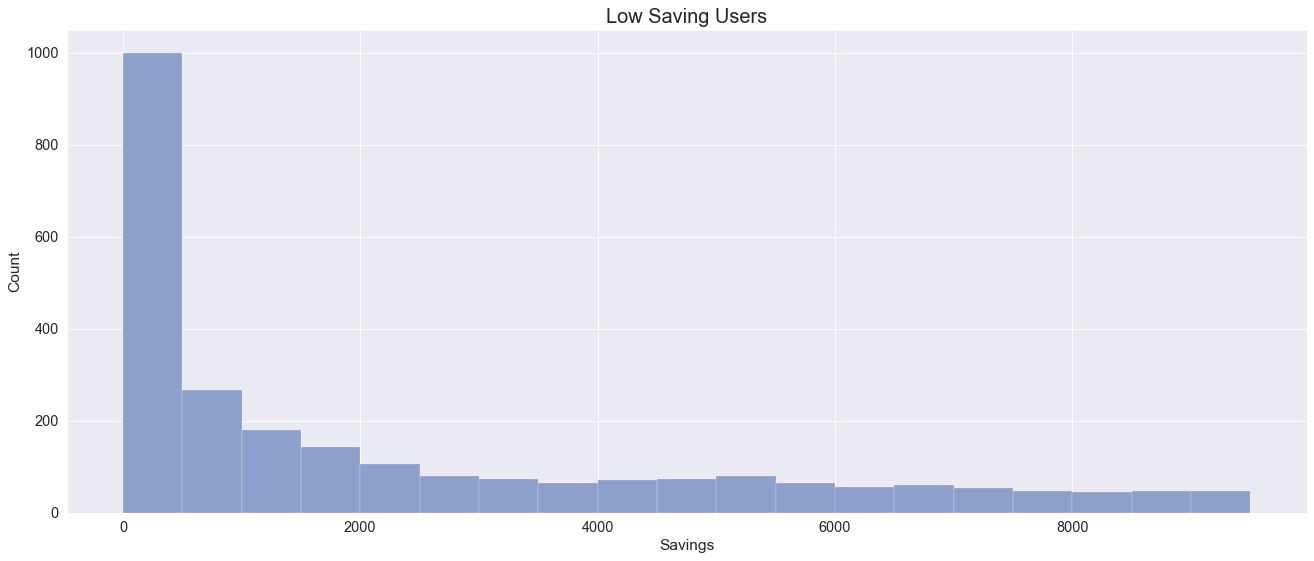

In [160]:
# looks like a lot of users are within the range 1~10000, lets take a look
# set a bin range
bins = np.arange(1,10000,500) 
plt.figure(figsize=(20, 8), dpi=80)
#plot
lowSavings = df[(df['台外幣總存款'] < 10001) & (df['台外幣總存款'] > 0)]['台外幣總存款']
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(lowSavings,
         bins=bins,
         color=sns.color_palette('Set2')[2],
         linewidth=0.2
        )
plt.title('Low Saving Users')
plt.xlabel('Savings')
plt.ylabel('Count')
plt.show()

In [161]:
print(str("{:.4f}".format(len(df[df['台外幣總存款'] == 0])/len(df['台外幣總存款'])*100)) + "% are users with no savings")
# so this is cool, we have only 5 % of users with no savings
# but we have 20% of users who never logged in...
# therefore we have users with savings but never logged in?

5.4951% are users with no savings


# 台幣總存款

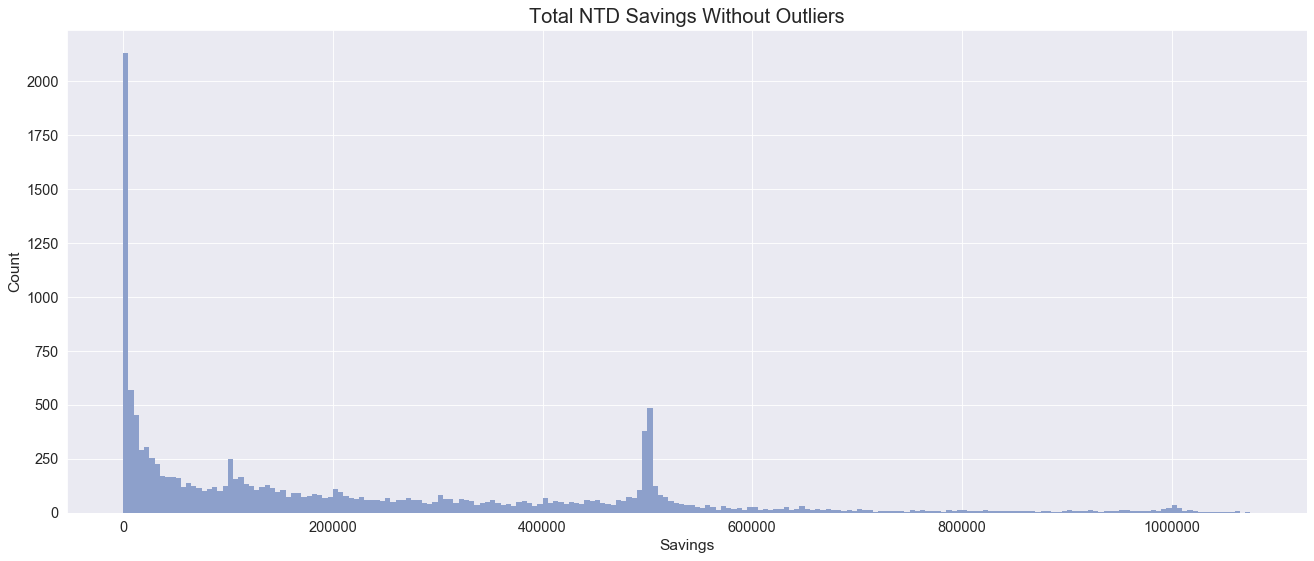

In [162]:
# basically same as above but without other currencies
# again there are outliers in this column, lets Calculate IQR and graph data within specific range only
savings = df[df['台幣總存款']!=0]['台幣總存款']
Q1 = np.percentile(savings, 25, interpolation = 'midpoint') # The lower quartile Q1
Q3 = np.percentile(savings, 75, interpolation = 'midpoint') # The upper quartile Q3
IQR = Q3-Q1 # Interquartile range
upper_limit = Q3+1.5*IQR 
lower_limit = Q1-1.5*IQR

# set a bin range
bins = np.arange(1,upper_limit,5000) 

#plot
savingsIQR = df[(df['台幣總存款'] < upper_limit) & (df['台幣總存款'] > 0)]['台幣總存款']
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(savingsIQR,
         bins=bins,
         color=sns.color_palette('Set2')[2],
         linewidth=0
        )
plt.title('Total NTD Savings Without Outliers')
plt.xlabel('Savings')
plt.ylabel('Count')
plt.show()

# Now we are seeing some nice info around the 50w mark.
# Since DaWho 1.1% interest rate cutoff is at 50w, this is expected
# but i wonder why there are more people around 100w?
# we can also see that there are a lot of people with savings around 10w
# which i believe is the threshold for 1.1%?

In [163]:
# lets quickly chack how much percent of our sample has sacings around 45w to 55w
interestLovers = df[(df['台幣總存款'] > 495000) & (df['台幣總存款'] < 505000)]['台幣總存款']
print(str("{:.4f}".format(len(interestLovers)/len(df['台幣總存款'])*100)) + "% of users are within range (49.5w, 50.5w)")
print(str("{:.4f}".format(len(df[df['台幣總存款'] == 500000])/len(df['台幣總存款'])*100)) + "% are users with exactly 50w")
print(str("{:.4f}".format(len(df[df['台幣總存款'] < 100000])/len(df['台幣總存款'])*100)) + "% users less than 10w")

5.5724% of users are within range (49.5w, 50.5w)
1.2884% are users with exactly 50w
44.6756% users less than 10w


# 外幣總存款

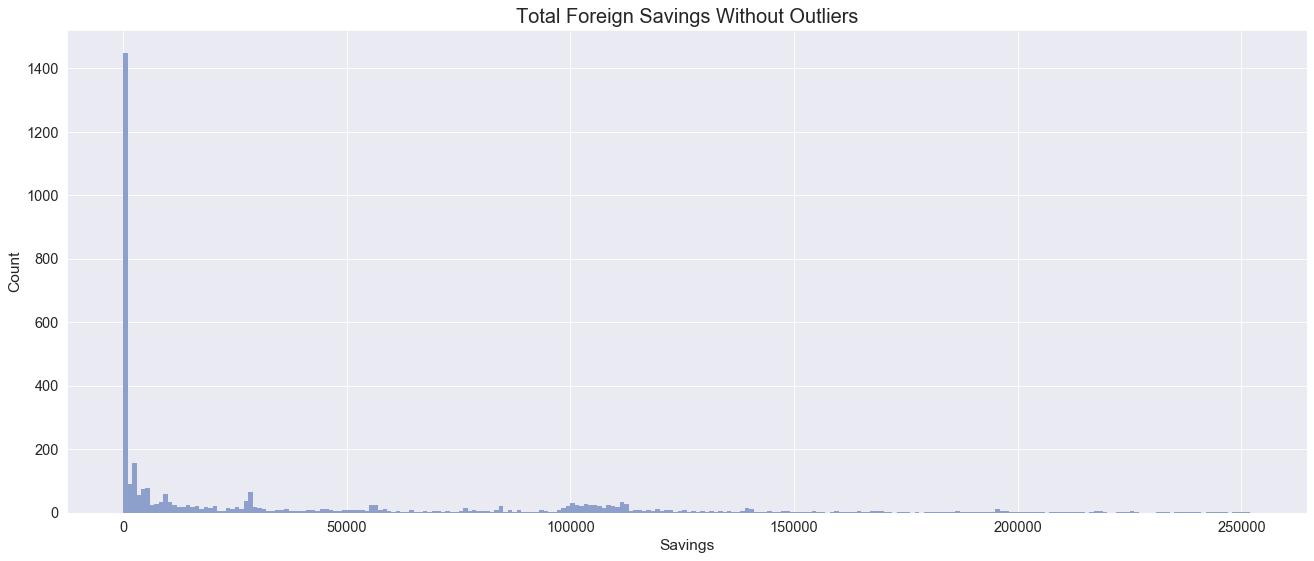

In [164]:
# basically same as above but for foriegn currencies only
# again there are outliers in this column, lets Calculate IQR and graph data within specific range only
foreignSavings = df[df['外幣總存款']!=0]['外幣總存款'] # got rid of zeroes (too many zeroes originally caused the mean to be 0)
                                                     # and hence a very low upper quartile range.
Q1 = np.percentile(foreignSavings, 25, interpolation = 'midpoint') # The lower quartile Q1
Q3 = np.percentile(foreignSavings, 75, interpolation = 'midpoint') # The upper quartile Q3
IQR = Q3-Q1 # Interquartile range
upper_limit = Q3+1.5*IQR 
lower_limit = Q1-1.5*IQR

# set a bin range
bins = np.arange(1,upper_limit,1000) 

#plot
foreignSavingsIQR = df[df['外幣總存款'] < upper_limit]['外幣總存款']
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(foreignSavingsIQR,
         bins=bins,
         color=sns.color_palette('Set2')[2],
         linewidth=0
        )
plt.title('Total Foreign Savings Without Outliers')
plt.xlabel('Savings')
plt.ylabel('Count')
plt.show()

# so for foreign currency we dont see the surge in people with 50w savings now
# also note a lot of people dont have foreign currency savings at all 

In [165]:
# lets check the percentage of users who dont have money in any foreign currency
print(str("{:.2f}".format(len(df[df['外幣總存款']==0]['外幣總存款'])/len(df['外幣總存款'])*100)) + "% dont have foreign currency savings")

73.54% dont have foreign currency savings


# 信託投資金額

In [63]:
df['信託投資金額'].describe() # 75% is at zero which means a lot of users dont invest
print(str("{:.4f}".format(len(df[df['信託投資金額']==0])/len(df)*100)) + 
      "% of users dont invest")

97.8937% of users dont invest


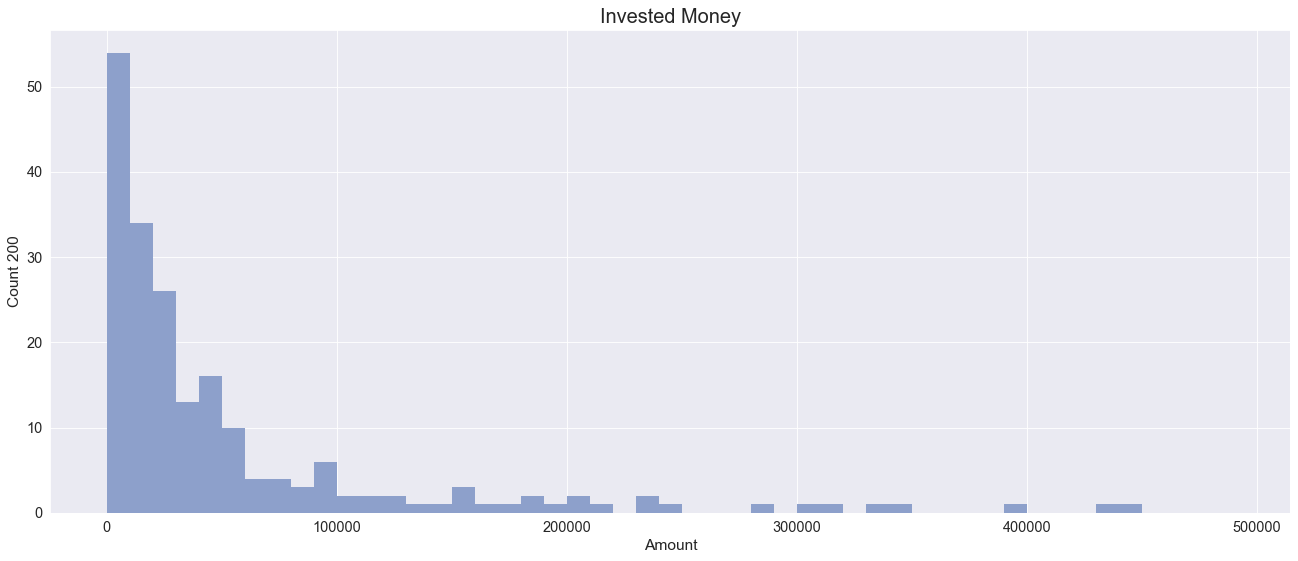

In [167]:
# lets plot the users who do invest and less than 50w
investors = df[(df['信託投資金額']!=0) & (df['信託投資金額']<500000)]['信託投資金額']

# set a bin range
bins = np.arange(1,500000,10000)

# plot
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(investors,
         bins=bins,
         color=sns.color_palette('Set2')[2],
         linewidth=0
        )
plt.title('Invested Money')
plt.xlabel('Amount')
plt.ylabel('Count ' + str(len(investors)))
plt.show()

# most of our customers are small incvestors
# but only 106 invested

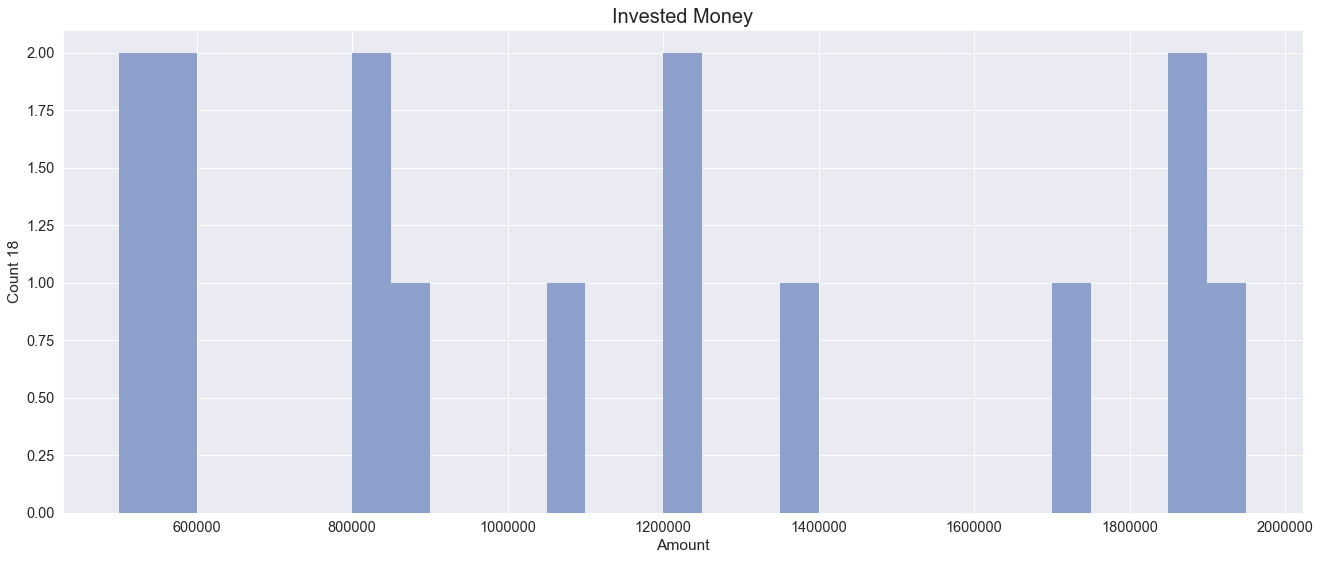

In [168]:
# lets plot the users who do invest and less than 50w
investors = df[(df['信託投資金額']!=0) & (df['信託投資金額']>500000)]['信託投資金額']

# set a bin range
bins = np.arange(500000,2000000,50000)

# plot
plt.figure(figsize=(20, 8), dpi=80)
plt.hist(investors,
         bins=bins,
         color=sns.color_palette('Set2')[2],
         linewidth=0
        )
plt.title('Invested Money')
plt.xlabel('Amount')
plt.ylabel('Count ' + str(len(investors)))
plt.show()

# most of our customers are small incvestors

# 台外幣總存款 vs 年齡

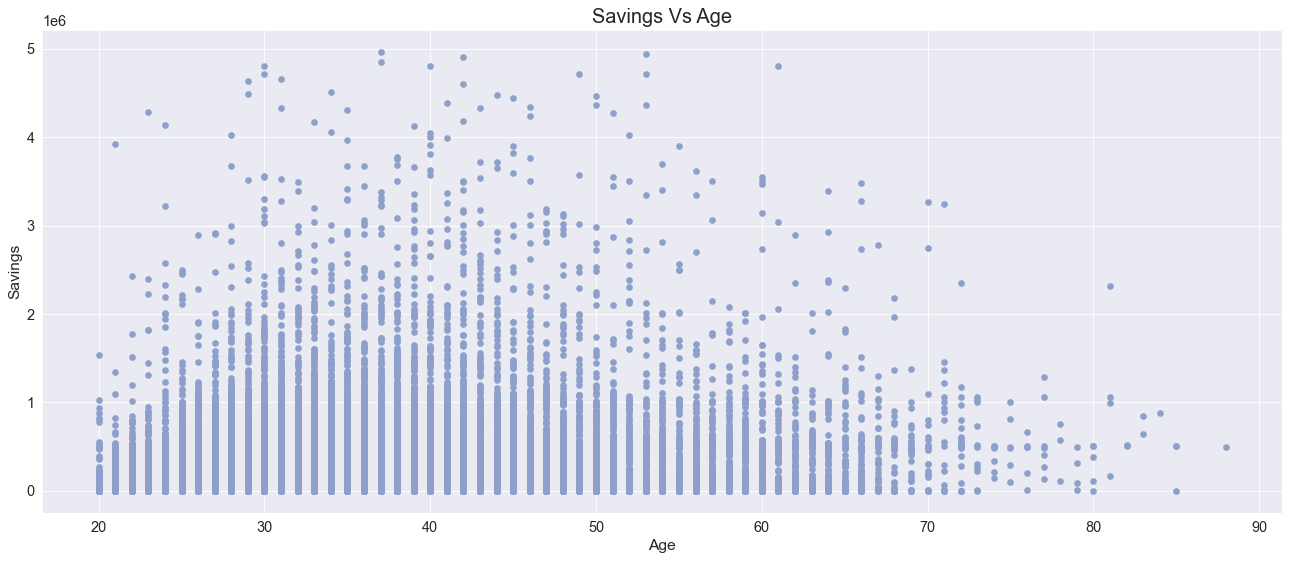

In [41]:
x = df['年齡'][df['台外幣總存款'] < 5000000]
y = df['台外幣總存款'][df['台外幣總存款'] < 5000000]
# plot
plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(x, 
            y,
            color=sns.color_palette('Set2')[2],
            linewidth=0)
plt.title('Savings Vs Age')
plt.xlabel('Age')
plt.ylabel('Savings')
plt.show()

# not much to say here 

# 往來期間(月) VS 台外幣總存款

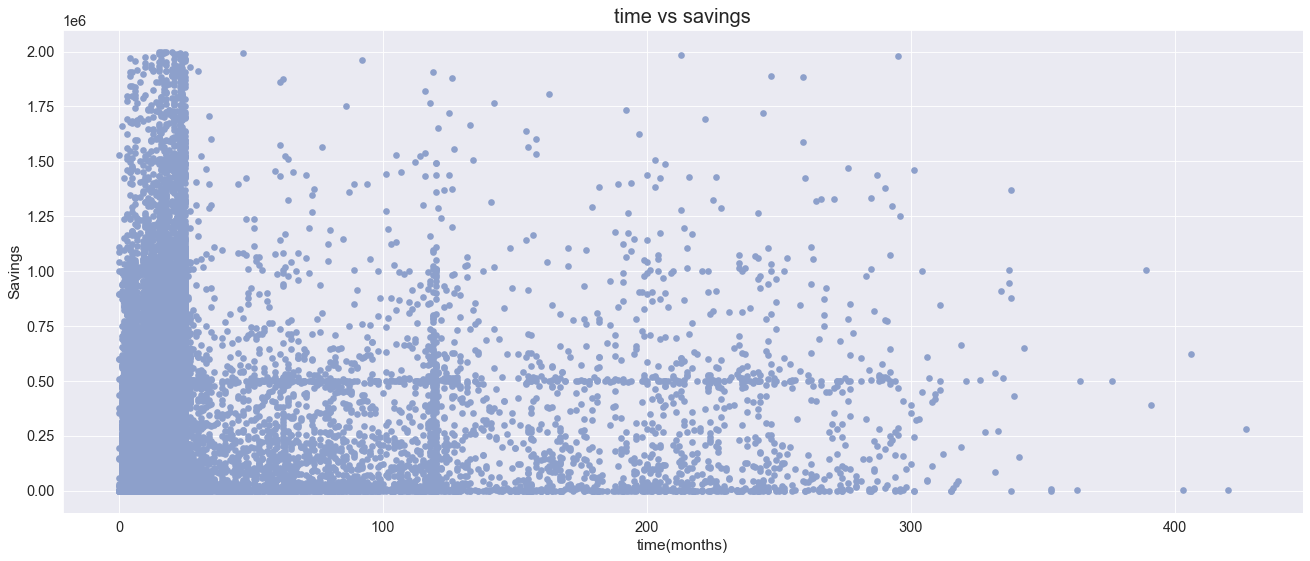

In [27]:
x = df['往來期間(月)'][df['台外幣總存款'] < 2000001]
y = df['台外幣總存款'][df['台外幣總存款'] < 2000001]
# plot
plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(x, 
            y,
            color=sns.color_palette('Set2')[2],
            linewidth=0)
plt.title('time vs savings')
plt.xlabel('time(months)')
plt.ylabel('Savings')
plt.show()

# not much to say here 

# 收入 VS 年齡

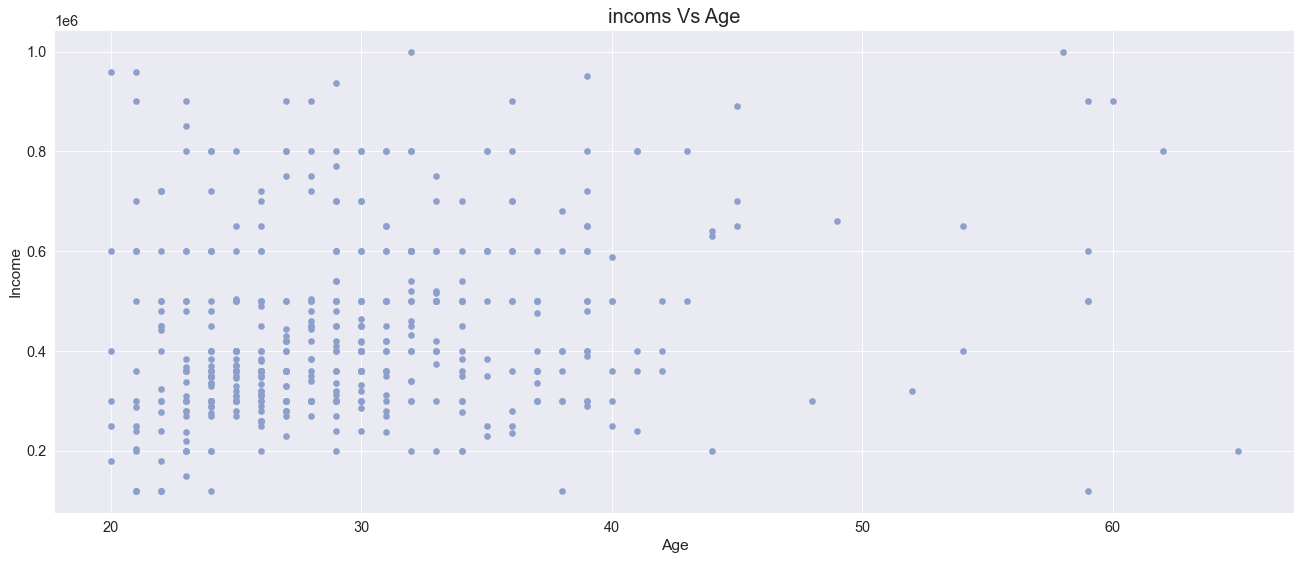

In [62]:
x = df[df['客戶年收入'] > 100000]['年齡']
y = df[df['客戶年收入'] > 100000]['客戶年收入']
# plot
plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(x, 
            y,
            color=sns.color_palette('Set2')[2],
            linewidth=0)
plt.title('incoms Vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Maybe looking at people with no income seperately would help?
# there is a trend in age and income

# 往來期間(月) vs 年齡

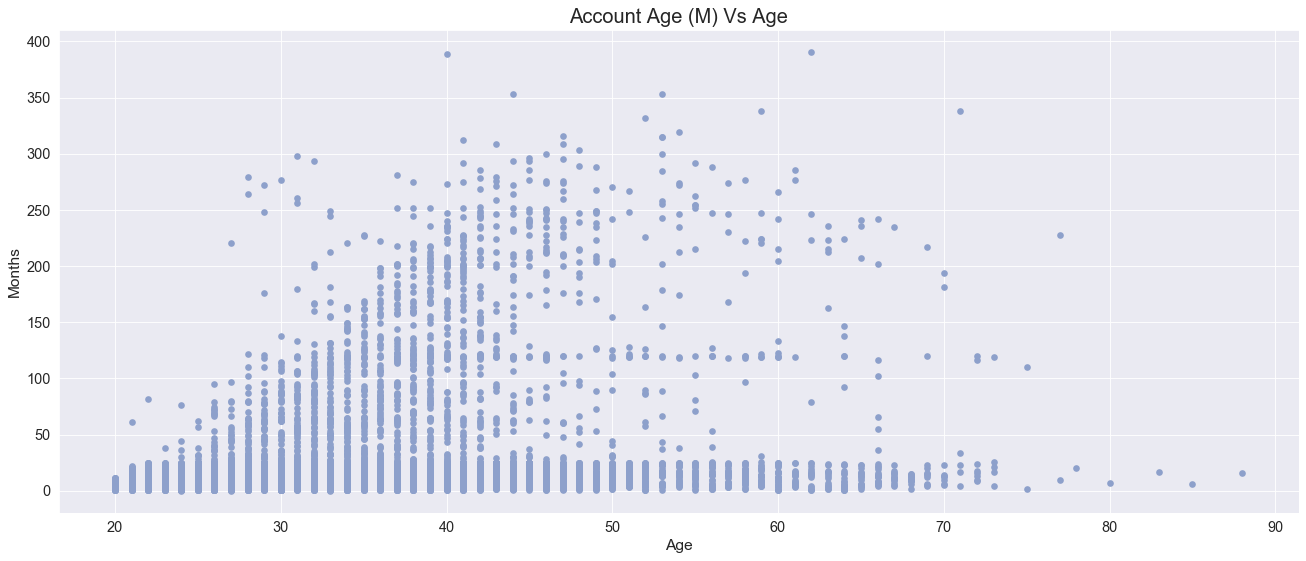

In [195]:
x = df['年齡']
y = df['往來期間(月)']
# plot
plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(x, 
            y,
            color=sns.color_palette('Set2')[2],
            linewidth=0)
plt.title('Account Age (M) Vs Age')
plt.xlabel('Age')
plt.ylabel('Months')
plt.show()

# 最近交易期間(月) vs 年齡

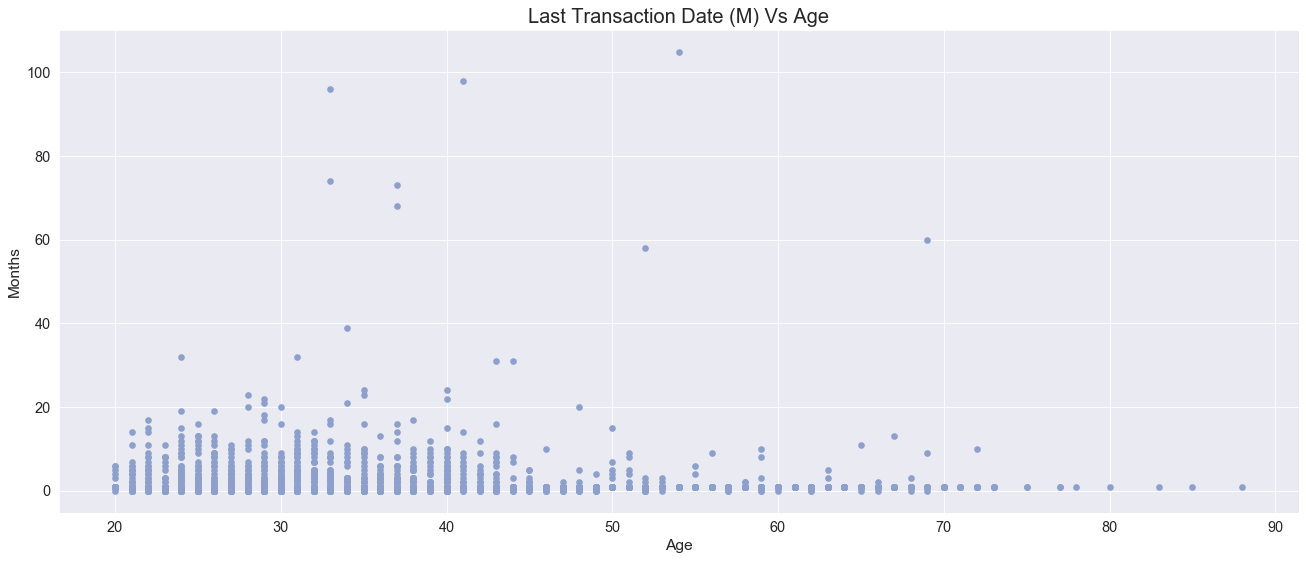

In [196]:
x = df['年齡']
y = df['最近交易期間(月)']
# plot
plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(x, 
            y,
            color=sns.color_palette('Set2')[2],
            linewidth=0)
plt.title('Last Transaction Date (M) Vs Age')
plt.xlabel('Age')
plt.ylabel('Months')
plt.show()

In [49]:

Homeloan = df[df['放款總餘額  一般房貸(36)'] == 0]['放款總餘額  一般房貸(36)']

# len(df[df['房貸持有'] != 0]['房貸持有'])/len(df)
df[df['放款總餘額房貸'] != 0]['年齡'].describe()

count    662.000000
mean      38.442598
std        9.047305
min       21.000000
25%       32.000000
50%       37.000000
75%       43.000000
max       72.000000
Name: 年齡, dtype: float64

In [48]:
# len(df[df['信貸持有'] != 0]['信貸持有']/len(df)
df[df['放款總餘額  信貸(41_42)'] != 0]['年齡'].describe()

count    1765.000000
mean       33.369972
std         7.382542
min        20.000000
25%        28.000000
50%        32.000000
75%        38.000000
max        68.000000
Name: 年齡, dtype: float64

In [89]:
# len(df[df['當月基金申購金額'] != 0]['當月基金申購金額'])/len(df)
df[df['當月基金申購金額'] != 0]['當月基金申購金額'].describe()

count    7.550000e+02
mean     1.883869e+04
std      8.470722e+04
min      1.000000e+02
25%      3.000000e+03
50%      5.000000e+03
75%      1.000000e+04
max      1.387612e+06
Name: 當月基金申購金額, dtype: float64

In [47]:
df[df['當月基金申購金額'] != 0]['年齡'].describe()

count    755.000000
mean      36.460927
std       10.157487
min       20.000000
25%       28.000000
50%       35.000000
75%       42.500000
max       76.000000
Name: 年齡, dtype: float64

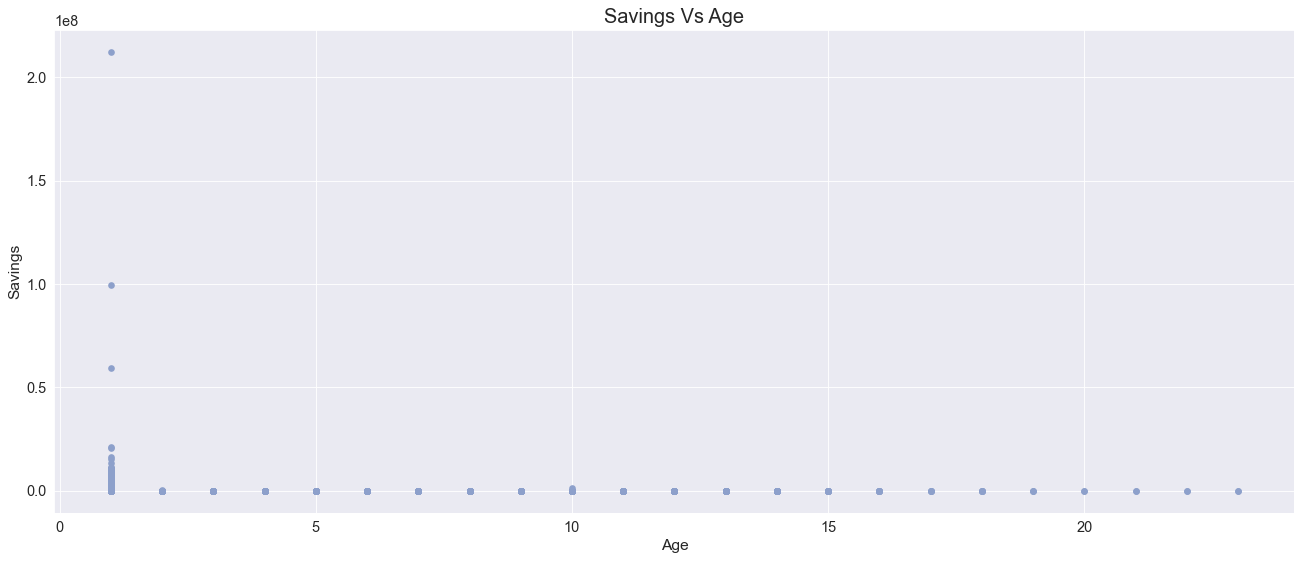

In [51]:
x = df['最近交易期間(月)'][df['台外幣總存款'] > 0]
y = df['台外幣總存款'][df['台外幣總存款'] > 0]
# plot
plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(x, 
            y,
            color=sns.color_palette('Set2')[2],
            linewidth=0)
plt.title('Savings Vs Age')
plt.xlabel('Age')
plt.ylabel('Savings')
plt.show()

# not much to say here 

In [61]:
len(df[df['最近交易期間(月)'] == 1]['最近交易期間(月)'])/len(df)

0.9338749018148745